In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mat
import numpy as np

In [2]:
df=pd.read_csv("final_df.csv")

In [3]:
df=df.drop(columns=["Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"])

In [4]:
df

,Kategorie,Titel,Autor,Datum,content,scores_text_sum,scores_titel_sum
0,Opinions,“Shotgun Justice: One Prosecutor’s Crusade Aga...,Robert B. Mitchell,2012-12-15T00:10:12Z,By Michael Lee PopeHistory Press. 126 pp. Pape...,-0.027489,-0.002797
1,Politics,A normally stoic president sheds tears over ma...,Philip Rucker; Scott Wilson,2012-12-15T01:30:00Z,"President Obama, so often cool and unemotional...",-0.130385,-0.002634
2,Local,Sandy Hook shooting: How can we protect our ki...,Petula Dvorak,2012-12-15T05:24:53Z,"We live in a society that makes it very, very ...",-0.084744,-0.001800
3,Local,Conn. school shooting prompts gun-control serm...,Nikita Stewart,2012-12-15T17:19:42Z,"The Rev. Gary Hall, dean of Washington Nationa...",-0.007602,-0.002526
4,Local,"In Pr. George’s County, more than 150 guns col...",Ovetta Wiggins,2012-12-15T20:28:28Z,The gun buyback event in Prince George’s Count...,-0.029431,-0.002758
...,...,...,...,...,...,...,...
1729,Fancy Stats,The Hawks’ shooting in their Game 1 loss to Wi...,Neil Greenberg,2015-05-04T14:35:18Z,The Washington Wizards once again won a playof...,0.004537,-0.002716
1730,The Watch,When violence and lawlessness are acceptable,Radley Balko,2015-05-04T17:42:15Z,"Yesterday, the Fox News show Fox & Friends dev...",-0.409940,-0.002737
1731,Local,Fairfax County police release video in 2009 of...,Tom Jackman,2015-05-06T21:33:21Z,Note: This post has been updated to edit the v...,-0.104839,-0.002810
1732,Post Nation,Oregon expands background checks to almost all...,Mark Berman,2015-05-11T21:46:44Z,Oregon Gov. Kate Brown signed a bill Monday ex...,-0.016458,-0.002630


In [5]:
df.describe

<bound method NDFrame.describe of         Kategorie                                              Titel  \
0        Opinions  “Shotgun Justice: One Prosecutor’s Crusade Aga...   
1        Politics  A normally stoic president sheds tears over ma...   
2           Local  Sandy Hook shooting: How can we protect our ki...   
3           Local  Conn. school shooting prompts gun-control serm...   
4           Local  In Pr. George’s County, more than 150 guns col...   
...           ...                                                ...   
1729  Fancy Stats  The Hawks’ shooting in their Game 1 loss to Wi...   
1730    The Watch       When violence and lawlessness are acceptable   
1731        Local  Fairfax County police release video in 2009 of...   
1732  Post Nation  Oregon expands background checks to almost all...   
1733  Post Nation  Police now say a SWAT team, not a single traff...   

                            Autor                 Datum  \
0              Robert B. Mitchell  2012-12

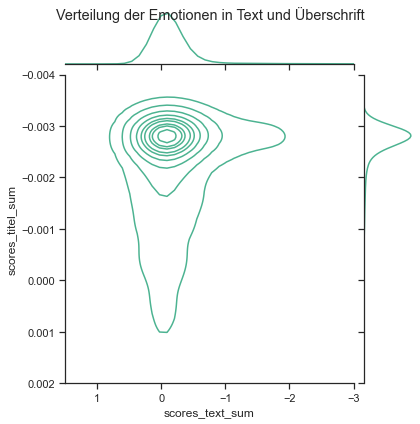

In [13]:
sns.set_theme(style="ticks")

x = df["scores_text_sum"]
y = df["scores_titel_sum"]

rel=sns.jointplot(x=x, y=y, kind="kde", color="#4CB391",xlim=(1.5,-3),ylim=(0.002,-0.004))

rel.fig.suptitle('Verteilung der Emotionen in Text und Überschrift')
rel.savefig("Verteilung.jpg")

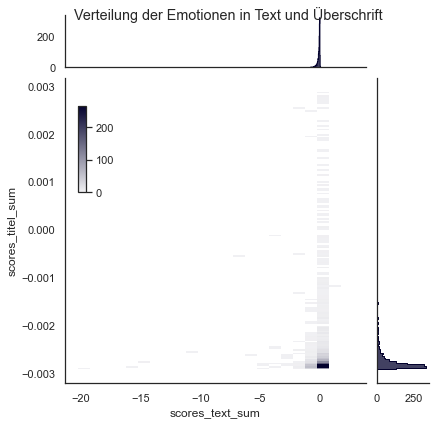

In [33]:
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x=x, y=y, marginal_ticks=True)

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])
g.fig.suptitle('Verteilung der Emotionen in Text und Überschrift')

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
g.savefig("Verteilung1.jpg")

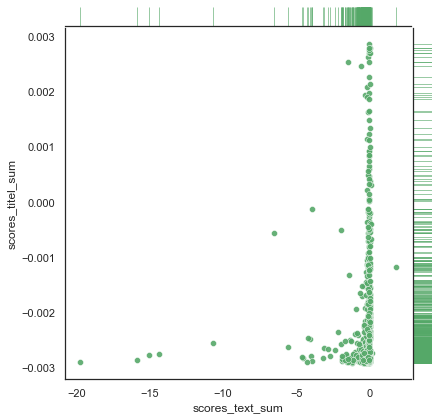

In [29]:
sns.set_theme(style="white", color_codes=True)

# Use JointGrid directly to draw a custom plot
g.fig.suptitle('Verteilung der Emotionen in Text und Überschrift')

g = sns.JointGrid(data=df, x=x, y=y, space=0.1, ratio=17)
g.plot_joint(sns.scatterplot,color="g", alpha=.9, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)
g.savefig("Verteilung2.jpg")